In [24]:
import numpy as np
import matplotlib.pyplot as plt

all_lines = np.load("all_lines.npz")
RV = all_lines["arr_0"]
RVErr = all_lines["arr_1"]

outputfile = np.load("output_file.npz")
means = outputfile["arr_0"]
error = outputfile["arr_1"]
neidrv = outputfile["arr_2"]
time = outputfile["arr_3"]
angle = outputfile["arr_4"]
wavelines = outputfile["arr_5"]
contdiff = outputfile["arr_6"]
linedepth = outputfile["arr_7"]
temperatures = outputfile["arr_8"]
pearsoncorr = outputfile["arr_11"]
perline = outputfile["arr_12"]
numlines = outputfile["arr_13"]

In [25]:
normalmean, meancold,meanl, meanhot, errcold, errl, errhot = np.zeros(len(RV)),np.zeros(len(RV)),np.zeros(len(RV)),\
np.zeros(len(RV)),np.zeros(len(RV)),np.zeros(len(RV)),np.zeros(len(RV))

for i in range(len(RV)):
    rv = RV[i]
    rverr = RVErr[i]
    cut = np.where((rverr < 3*np.nanmean(rverr)) &\
    (np.abs(rv - np.nanmean(rv)) < 3*np.nanstd(rv))& (np.abs(pearsoncorr) < 0.5) & (perline > 0.01))
    cutcold = np.where((rverr < 3*np.nanmean(rverr)) &(temperatures <4900) &\
    (np.abs(rv - np.nanmean(rv)) < 3*np.nanstd(rv))& (np.abs(pearsoncorr) < 0.5) & (perline > 0.01))
    cutl = np.where((rverr < 3*np.nanmean(rverr))&(temperatures >4900) &(temperatures <5100) &\
    (np.abs(rv - np.nanmean(rv)) < 3*np.nanstd(rv))& (np.abs(pearsoncorr) < 0.5) & (perline > 0.01))
    cuthot = np.where((rverr < 3*np.nanmean(rverr)) & (temperatures >5100) &\
    (np.abs(rv - np.nanmean(rv)) < 3*np.nanstd(rv))& (np.abs(pearsoncorr) < 0.5) & (perline > 0.01))
    meancold[i] = np.sum(rv[cutcold]/(rverr[cutcold]**2))/np.sum(1/(rverr[cutcold]**2))
    meanl[i] = np.sum(rv[cutl]/(rverr[cutl]**2))/np.sum(1/(rverr[cutl]**2))
    meanhot[i] = np.sum(rv[cuthot]/(rverr[cuthot]**2))/np.sum(1/(rverr[cuthot]**2))
    normalmean[i] = np.sum(rv[cut]/(rverr[cut]**2))/np.sum(1/(rverr[cut]**2))
    errcold[i] = np.mean(rverr[cutcold])
    errl[i] = np.mean(rverr[cutl])
    errhot[i] = np.mean(rverr[cuthot])
    

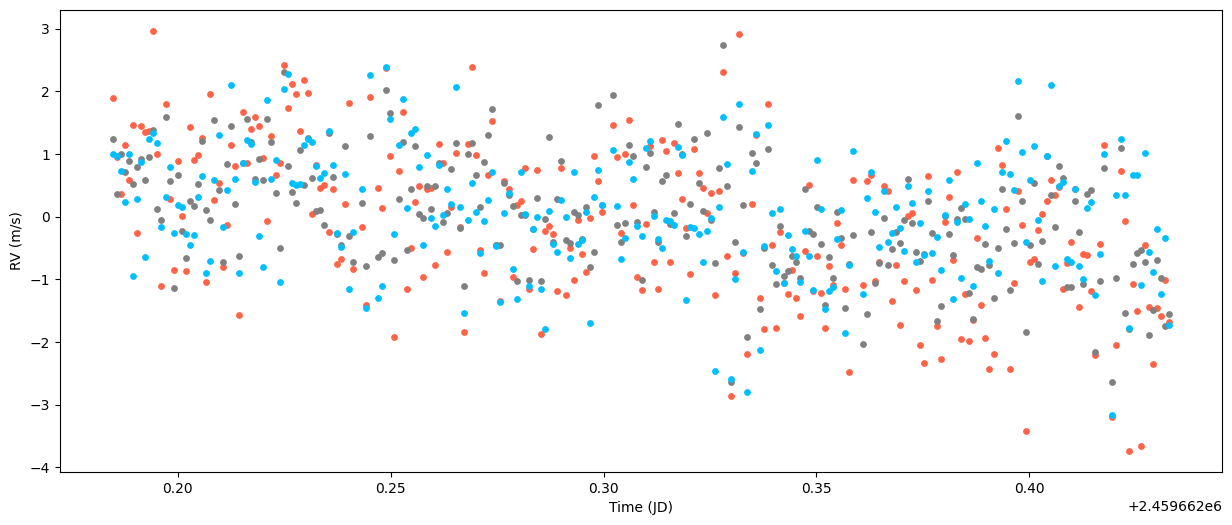

In [26]:
plt.figure(figsize=(15, 6))
plt.scatter(time, meanhot, color="tomato", s=15)
plt.scatter(time, meanl, color="gray", s=15)
plt.scatter(time, meancold, color="deepskyblue", s=15)
plt.xlabel("Time (JD)")
plt.ylabel("RV (m/s)")
#plt.scatter(time, (neidrv-np.mean(neidrv)), s=1, color="black")
plt.show()

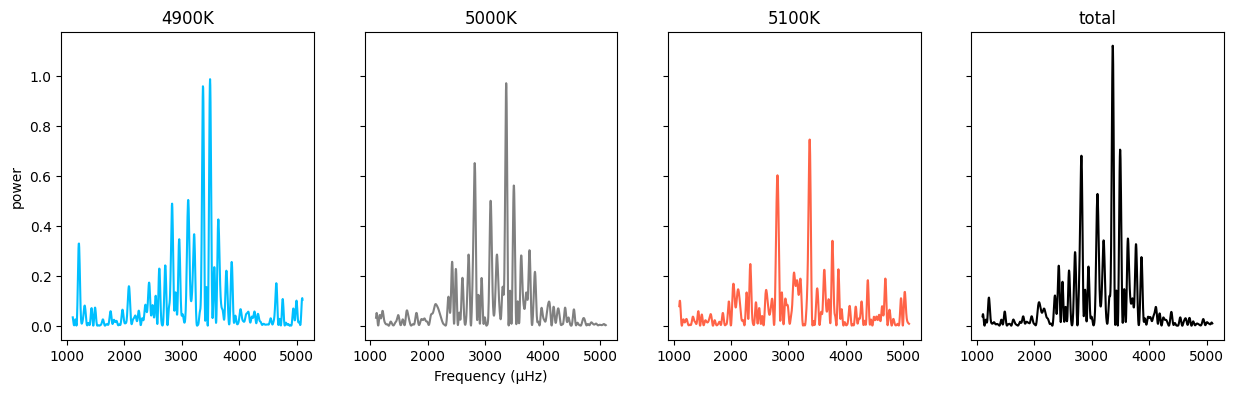

In [30]:
from astropy.timeseries import LombScargle

frequ = np.linspace(1100, 5100, 1000)*(10**(-6))

fig, ax = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

ls = LombScargle((time-np.mean(time))*86400, means, error)
#plt.xlabel("Frequency (μHz)")
ax[3].plot(frequ*(10**6), ls.power(frequ)/ls.false_alarm_level(0.01),color="black")
ax[3].set_title("total")
ax[0].set_ylabel("power")
ls1 = LombScargle((time-np.mean(time))*86400, meanl, errl)
ax[1].set_xlabel("Frequency (μHz)")
ax[1].plot(frequ*(10**6), ls1.power(frequ)/ls1.false_alarm_level(0.01), color="gray")
ax[1].set_title("5000K")
ls2 = LombScargle((time-np.mean(time))*86400, meancold, errcold)
ax[0].plot(frequ*(10**6), ls2.power(frequ)/ls2.false_alarm_level(0.01), color = "deepskyblue")
ax[0].set_title("4900K")
ls3 = LombScargle((time-np.mean(time))*86400, meanhot, errhot)
ax[2].plot(frequ*(10**6), ls3.power(frequ)/ls2.false_alarm_level(0.01), color="tomato")
ax[2].set_title("5100K")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


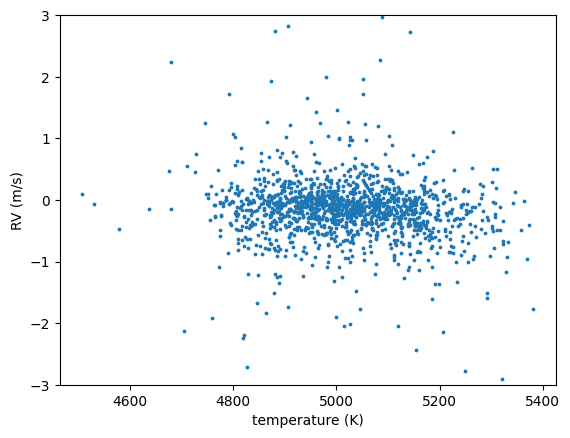

In [19]:
avgrv = np.nanmean(RV, axis=0)
plt.scatter(temperatures, avgrv, s=3)
plt.ylim(-3, 3)
plt.xlabel("temperature (K)")
plt.ylabel("RV (m/s)")
plt.show()